In [1]:
!pip install emoji

In [2]:
!pip install nlpaug

In [3]:
import pandas as pd
import string
import re
import nltk
import emoji

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:


# Force download to standard location
nltk.download('punkt_tab')

nltk.download('averaged_perceptron_tagger_eng')
nltk.download('universal_tagset')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [5]:
df = pd.read_csv('hate-speech.csv')
print(df.head()['tweet'])

0    !!! RT @mayasolovely: As a woman you shouldn't...
1    !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2    !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3    !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4    !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
Name: tweet, dtype: object


In [6]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'https?://\S+|www\.\S+', '', tweet)
    tweet = re.sub(r'\brt\b', '', tweet)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'#\w+', '', tweet)


    tweet = emoji.replace_emoji(tweet, replace='')

    tweet = re.sub(r'[^a-z\s]', '', tweet)

    tokens = nltk.word_tokenize(tweet)

    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]

    return ' '.join(tokens)


def remove_brackets(tweet):
    return tweet.strip('[]')

df['tweet'] = df['tweet'].apply(clean_tweet)
df['tweet'] = df['tweet'].apply(remove_brackets)
df['tweet'] = df['tweet'].str.replace('[\[\]]', '', regex=True)




In [ ]:
df.head(20)['tweet']

,tweet
0,woman shouldnt complain cleaning house amp man...
1,boy dat coldtyga dwn bad cuffin dat hoe st place
2,dawg ever fuck bitch start cry confused shit
3,look like tranny
4,shit hear might true might faker bitch told ya
5,shit blow meclaim faithful somebody still fuck...
6,sit hate another bitch got much shit going
7,cause im tired big bitch coming u skinny girl
8,amp might get ya bitch back amp thats
9,hobby include fighting mariam bitch


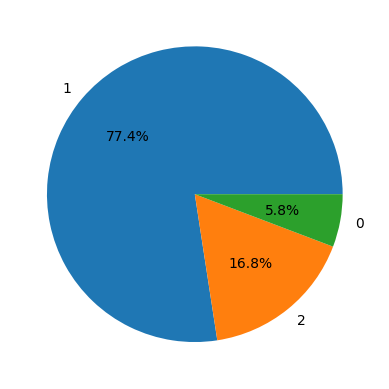

In [7]:
import matplotlib.pyplot as plt

plt.pie(df['class'].value_counts().values, labels=df['class'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [8]:
# Check the path NLTK is using
print(nltk.data.path)

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [9]:
def augment_class(df_class, target_count):
    augmented_texts = []
    current_count = len(df_class)
    needed = target_count - current_count

    for i in range(needed):
        original_text = df_class.iloc[i % current_count]['tweet']
        new_text = aug.augment(original_text)
        augmented_texts.append({'tweet': new_text, 'class': df_class.iloc[i % current_count]['class']})

    return pd.DataFrame(augmented_texts)

In [10]:
print(len(df[df['class'] == 0]))
print(len(df[df['class'] == 1]))
print(len(df[df['class'] == 2]))

1430
19190
4163


/usr/local/lib/python3.11/dist-packages/torch_xla/__init__.py:251: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(


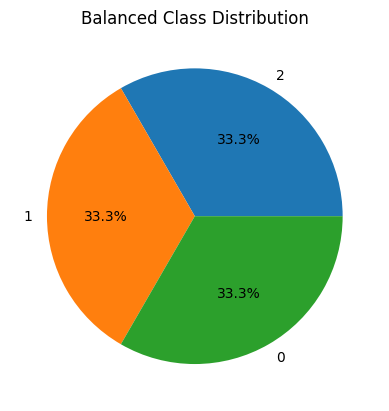

In [11]:
import nlpaug.augmenter.word as naw

"""Synonym Augmenting may also introduce repetition if the sentence is small and we use
multiple synonym generation so it's needed to reduce the sample size of class 1"""
class_0 = df[df['class'] == 0]  # Hate Speech
class_1 = df[df['class'] == 1]  # Offensive Language
class_2 = df[df['class'] == 2]  # Neutral

aug = naw.SynonymAug(aug_src='wordnet')
target_size = len(class_1)

aug_class_0 = augment_class(class_0, target_size)
aug_class_2 = augment_class(class_2, target_size)

balanced_df = pd.concat([class_0, aug_class_0, class_2, aug_class_2, class_1])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


# Visualize the balanced distribution
plt.pie(balanced_df['class'].value_counts().values,
        labels=balanced_df['class'].value_counts().index,
        autopct='%1.1f%%')
plt.title("Balanced Class Distribution")
plt.show()

In [24]:
balanced_df.head(20)

,class,tweet
0,2,[tranny]
1,1,yo bitch horn tryna shoot porn thats shirt wor...
2,2,[youre stuck ghetto center school day step wtf...
3,0,[lmao madonna music suction yeah youre fucking...
4,0,[minus retard inadequate bot]
5,2,[interpret every tweet dis like district attor...
6,2,[marshal law whatever procyon lotor]
7,0,[ud stock still fag lolz]
8,0,[sitting legal profession workplace watching w...
9,0,[nigga ask hoe]


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
features = balanced_df['tweet'].astype(str)
labels = balanced_df['class'].astype(str)

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42, stratify=labels
)



In [31]:
len(balanced_df['tweet'])

57570

In [15]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#Logistic Regression


In [ ]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

In [ ]:
y_pred = clf.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knnClassifier = KNeighborsClassifier(n_neighbors=3)
knnClassifier.fit(X_train_tfidf, y_train)

y_pred = knnClassifier.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


#Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svmClassifier = SVC(kernel='linear')
svmClassifier.fit(X_train_tfidf, y_train)

y_pred = svmClassifier.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

#Random Forest Classifier

In [28]:

from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train_tfidf, y_train)

y_pred = random_forest_classifier.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.87      0.87       840
           1       0.89      0.86      0.88       840
           2       0.90      0.95      0.92       840

    accuracy                           0.89      2520
   macro avg       0.89      0.89      0.89      2520
weighted avg       0.89      0.89      0.89      2520

[[727  68  45]
 [ 69 724  47]
 [ 29  17 794]]


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 20, 40, 60],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1_macro')
grid.fit(X_train_tfidf, y_train)  # Y_train_class = original integer labels (not one-hot)
print(grid.best_params_)

In [29]:
import joblib

joblib.dump(random_forest_classifier, 'rf_model.pkl')
joblib.dump(vectorizer,'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [30]:
from google.colab import files

files.download('rf_model.pkl')
files.download('tfidf_vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>